In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

with h5py.File('train_catvnoncat.h5', 'r') as file:
    train_set_x = file['train_set_x'][:]
    train_set_y = file['train_set_y'][:]


with h5py.File('test_catvnoncat.h5', 'r') as file:
    test_set_x = file['test_set_x'][:]
    test_set_y = file['test_set_y'][:]



classes=np.unique(train_set_y)

m_train=train_set_x.shape[0]
m_test=test_set_x.shape[0]
num_px=train_set_x.shape[1]


print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 1)")
print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_X=train_set_x.reshape(-1,m_train)
test_set_X=test_set_x.reshape(-1,m_test)
y_train=train_set_y.reshape(1,m_train)
y_test=test_set_y.reshape(1,m_test)

train_set_X=train_set_X/255.0
test_set_X=test_set_X/255.0


Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 1)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (209,)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (50,)


In [9]:
class NN_L:

    def __init__(self,X,y,layer_dim,epoch,learning_rate):
        self.X=X
        self.y=y
        self.param={}
        self.L=len(layer_dim)
        self.dim=layer_dim
        for i in range(1,self.L):
            self.param['W'+str(i)]=np.random.randn(self.dim[i],self.dim[i-1])*0.01
            self.param['b'+str(i)]=np.zeros((self.dim[i],1))
        self.epoch=epoch
        self.learning_rate=learning_rate
        self.m=self.X.shape[1]
    @staticmethod
    def sigmoid(x):
        return 1/(1+np.exp(-x))
    @staticmethod
    def relu(x):
        return np.maximum(0,x)
    @staticmethod
    def dev_relu(x):
        return (x > 0).astype(int)


    def forward(self):
        A=self.X
        cache={}
        cache['A'+str(0)]=A
        for i in range(1,self.L-1):
            Z=np.dot(self.param['W'+str(i)],A)+self.param['b'+str(i)]
            A=NN_L.relu(Z)

            cache['Z'+str(i)]=Z
            cache['A'+str(i)]=A

        Z=np.dot(self.param['W'+str(self.L-1)],A)+self.param['b'+str(self.L-1)]
        A=NN_L.sigmoid(Z)

        cache['Z'+str(self.L-1)]=Z
        cache['A'+str(self.L-1)]=A


        cost=-np.sum(self.y*np.log(A)+(1-self.y)*np.log(1-A))/self.m


        return cost,cache

    def backward(self,cache):
        grads={}

        dZ=cache['A'+str(self.L-1)]-self.y


        grads['dW'+str(self.L-1)]=np.dot(dZ,cache['A'+str(self.L-2)].T)/self.m
        grads['db'+str(self.L-1)]=np.sum(dZ,axis=1,keepdims=True)/self.m

        for i in reversed(range(1,self.L-1)):

            dZ=np.dot(self.param['W'+str(i+1)].T,dZ)*NN_L.dev_relu(cache['Z'+str(i)])
            grads['dW'+str(i)]=np.dot(dZ,cache['A'+str(i-1)].T)/self.m
            grads['db'+str(i)]=np.sum(dZ,axis=1,keepdims=True)/self.m

        return grads

    def update_param(self,grads):

        for i in range(1,self.L):
            self.param['W'+str(i)]-=self.learning_rate*grads['dW'+str(i)]
            self.param['b'+str(i)]-=self.learning_rate*grads['db'+str(i)]

    def fit(self):
        cost_list=[]
        for i in range(0,self.epoch):
            cost,cache=self.forward()
            grads=self.backward(cache)

            self.update_param(grads)
            cost_list.append(cost)


            A_L = cache['A' + str(self.L-1)]
            y_pred = (A_L >= 0.5) * 1.0
            accuracy = accuracy_score(self.y.flatten(), y_pred.flatten())
            print(f'Epoch {i} - loss: {cost}, accuracy: {accuracy}')

        plt.plot(cost_list)
        plt.show()

        


Epoch 0 - loss: 0.6931471822449803, accuracy: 0.5167464114832536
Epoch 1 - loss: 0.692905651950086, accuracy: 0.6555023923444976
Epoch 2 - loss: 0.692665324262428, accuracy: 0.6555023923444976
Epoch 3 - loss: 0.6924261776773454, accuracy: 0.6555023923444976
Epoch 4 - loss: 0.6921881963298532, accuracy: 0.6555023923444976
Epoch 5 - loss: 0.691951400124056, accuracy: 0.6555023923444976
Epoch 6 - loss: 0.6917157868475676, accuracy: 0.6555023923444976
Epoch 7 - loss: 0.6914813506449002, accuracy: 0.6555023923444976
Epoch 8 - loss: 0.6912480855664296, accuracy: 0.6555023923444976
Epoch 9 - loss: 0.6910159857267225, accuracy: 0.6555023923444976
Epoch 10 - loss: 0.6907850452654557, accuracy: 0.6555023923444976
Epoch 11 - loss: 0.6905552584251702, accuracy: 0.6555023923444976
Epoch 12 - loss: 0.6903266193821255, accuracy: 0.6555023923444976
Epoch 13 - loss: 0.6900991223779257, accuracy: 0.6555023923444976
Epoch 14 - loss: 0.6898727616912094, accuracy: 0.6555023923444976
Epoch 15 - loss: 0.6896

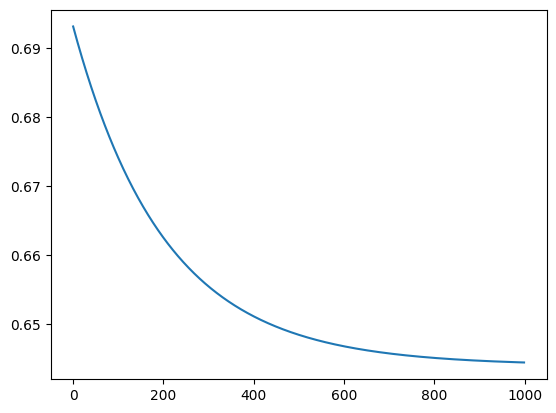

In [10]:
nn_l=NN_L(train_set_X,y_train,[train_set_X.shape[0],36,20,15,5,1],1000,0.01)

nn_l.fit()